In [1]:
!git clone https://github.com/irinatursunova4/2024-Tursunova-TimeSeriesCourse.git

Cloning into '2024-Tursunova-TimeSeriesCourse'...
remote: Enumerating objects: 658, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 658 (delta 124), reused 60 (delta 60), pack-reused 485 (from 1)
Receiving objects: 100% (658/658), 277.19 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (246/246), done.
Updating files: 100% (206/206), done.


In [2]:
import os

practice_dir_path = '/content/2024-Tursunova-TimeSeriesCourse/practice/06 Chains'
os.chdir(practice_dir_path)

# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [3]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [4]:
!pip install stumpy==1.11.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 5.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

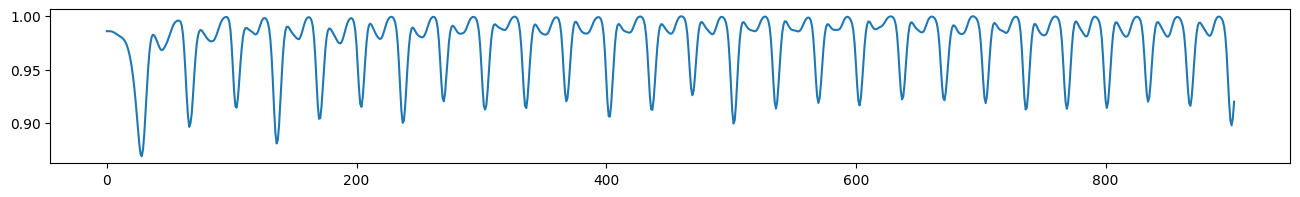

In [6]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [7]:
# INSERT YOUR CODE

window_size = 33
mp=stumpy.stump(ts, m=window_size)
all_chain_set, unanchored_chain= stumpy.allc(mp[:, 2], mp[:, 3]) #unanchored_chain самая длинная цепочка в ряду
print(unanchored_chain)

[144 376 410 644 841]


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

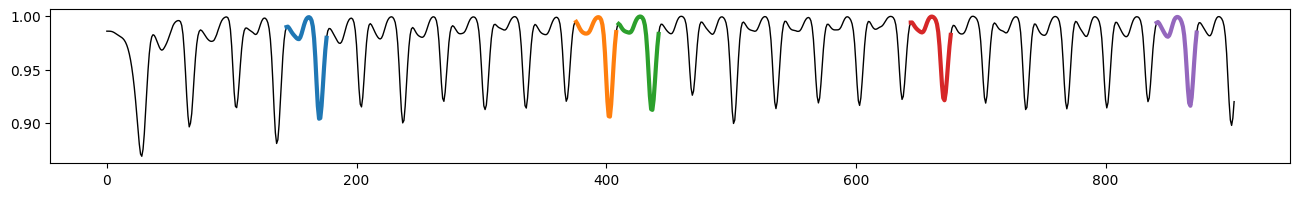

In [8]:
# INSERT YOUR CODE

fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, linewidth=1, color='black')
for i in range (unanchored_chain.shape[0]):
  y= ts[unanchored_chain[i]: unanchored_chain[i]+window_size]
  x = range (unanchored_chain[i], unanchored_chain[i]+window_size)
  plt.plot(x, y, linewidth=3)

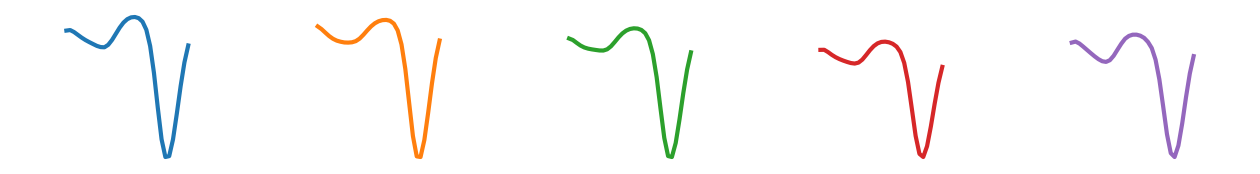

In [9]:
fig, ax = plt.subplots(figsize=(16, 2))
plt.axis('off')
m =window_size
for i in range (unanchored_chain.shape[0]):

  y = ts[unanchored_chain[i]:unanchored_chain[i]+window_size]
  x = np.array(range(unanchored_chain[i], unanchored_chain[i]+window_size))
  ax.plot(x-x.min()+(m*2)*i, y-y.min(), linewidth=3)

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [10]:
# INSERT YOUR CODE
true_val = ts[unanchored_chain[-1]:unanchored_chain[-1]+window_size]
diff =ts[unanchored_chain[-3]: unanchored_chain[-3]+window_size]- ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size]
pred_val = ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size] + diff


MSE: 7.011907217030383e-06


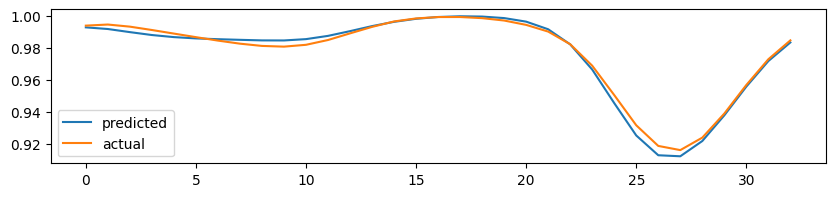

In [11]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(pred_val, label='predicted')
ax.plot(true_val, label='actual')
ax.legend(loc= 'lower left')
print (f'MSE: {mean_squared_error(true_val, pred_val)}')


❓ Проанализируйте и изложите содержательный смысл полученных результатов.